In [1]:
#Presento mi proyecto sobre acciones de Estados Unidos y algunos análisis 
#Primero accesamos a la API pública 'https://www.alphavantage.co/' donde nos registramos y nos dieron una API KEY
#Luego importamos el paquete y así fue más fácil ir haciendo los querys

In [52]:
#Importamos librerías 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py 
import cufflinks as cf 
import os

In [34]:
#Según la documentación importamos el paquete 
pip install alpha_vantage

SyntaxError: invalid syntax (<ipython-input-34-5564da29b9f6>, line 2)

In [36]:
#Obtenemos acceso a la API con nuestra API KEY 
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='4G4C1CBEXYY4KVUC', output_format='pandas')

In [37]:
#Obtenemos datos intradía y otros datos de alguna acción, de Apple en este caso 
#Observamos que nos da los últimos 100 registros solamente
aapl_data, aapl_info = ts.get_daily('AAPL')
len(aapl_data.index)

100

In [38]:
aapl_data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-03-06,174.67,175.49,173.94,174.52,20810384.0
2019-03-07,173.87,174.44,172.02,172.50,24796374.0
2019-03-08,170.32,173.07,169.50,172.91,23999358.0
2019-03-11,175.49,179.12,175.35,178.90,32011034.0
2019-03-12,180.00,182.67,179.37,180.91,32467584.0


In [39]:
#Con el método describe nos arroja algunos datos interesantes
aapl_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,194.504280,196.437095,193.057060,194.843200,2.687748e+07
std,10.043698,9.938871,10.214006,10.033925,9.701654e+06
min,170.320000,173.070000,169.500000,172.500000,1.136204e+07
25%,186.485000,189.541750,185.680000,188.125000,2.048147e+07
50%,196.934500,199.377500,195.610000,197.525000,2.506750e+07
75%,203.075000,204.402500,201.720000,202.957500,3.105408e+07
max,210.890000,215.310000,210.230000,211.750000,6.482733e+07


In [40]:
#Por si queremos hacer la petición en intradía 
#from pprint import pprint
#data, meta_data = ts.get_intraday(symbol='AAPL',interval='1min', outputsize='full')
#data.head(10)

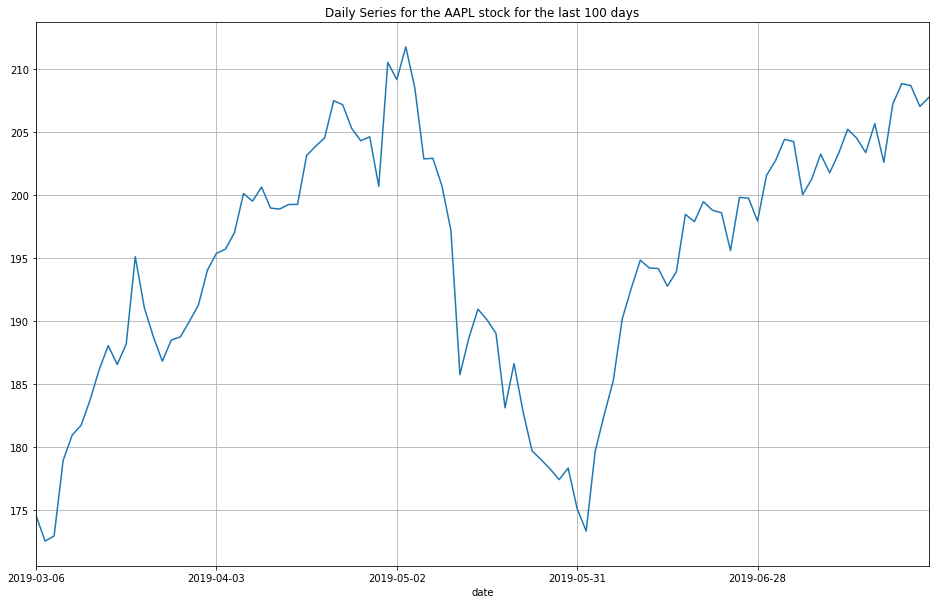

In [42]:
#De entrada los datos que nos interesan son los precios de cierre
#Graficamos aquí con matplotlib
plt.figure(figsize=(16, 10))
aapl_data['4. close'].plot()
plt.title('Daily Series for the AAPL stock for the last 100 days')
plt.grid()
plt.show()

In [41]:
cf.go_offline()

In [43]:
#Graficamos aquí con pyplot
aapl_data['4. close'].iplot(kind='scatter')

In [44]:
#Vamos a juntar varios stocks, en este ejemplo 5 monstruos de la tecnología
all_data, all_meta_data = ts.get_batch_stock_quotes(symbols=('MSFT', 'IBM', 'AAPL', 'DELL', 'GOOGL'))
all_data.describe()

,1. symbol,2. price,3. volume,4. timestamp
count,5,5,5,5
unique,5,5,1,4
top,GOOGL,207.8500,--,2019-07-26 15:59:55
freq,1,1,5,2


In [45]:
all_data

,1. symbol,2. price,3. volume,4. timestamp
date,,,,
0,MSFT,141.3800,--,2019-07-26 15:59:50
1,IBM,151.3400,--,2019-07-26 15:59:59
2,AAPL,207.8500,--,2019-07-26 15:59:54
3,DELL,55.2900,--,2019-07-26 15:59:55
4,GOOGL,1250.1500,--,2019-07-26 15:59:55


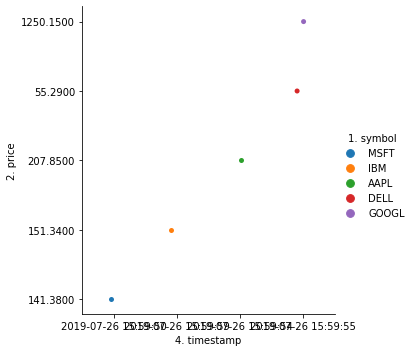

In [46]:
#Un comparativo de los precios de las diferentes acciones 
sns.catplot(x='4. timestamp', y='2. price', hue='1. symbol', data=all_data)

In [47]:
#Definitivamente graficamos mejor esta parte con pyplot
all_data.iplot(x='1. symbol', y='2. price', filename='cufflinks/x-vs-y-line-example')


In [48]:
#Aquí nos lo grafica bien pero no muestra los labels, es mejor la opción de arriba  
all_data['2. price'].iplot(kind='area', fill=True, filename='cuflinks/stacked-area')


In [53]:
#Ahora implementaremos algunos indicadores para la misma acción
#En este caso bandas de bolinger
from alpha_vantage.techindicators import TechIndicators
ti = TechIndicators(key='4G4C1CBEXYY4KVUC', output_format='pandas')

In [54]:
bbands_data, bbands_meta = ti.get_bbands(symbol='AAPL', interval='60min', time_period=60)
bbands_data.describe()

,Real Middle Band,Real Lower Band,Real Upper Band
count,358.000000,358.000000,358.000000
mean,193.997055,187.242619,200.751490
std,8.664542,11.089484,7.716577
min,178.243500,169.227300,182.484300
25%,186.242575,175.924225,196.213825
50%,196.537750,190.181300,202.118950
75%,201.221675,197.377025,205.825175
max,206.350200,202.893100,217.857400


In [55]:
bbands_meta

{'1: Symbol': 'AAPL',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2019-07-26 15:30:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

<Figure size 1440x1080 with 0 Axes>

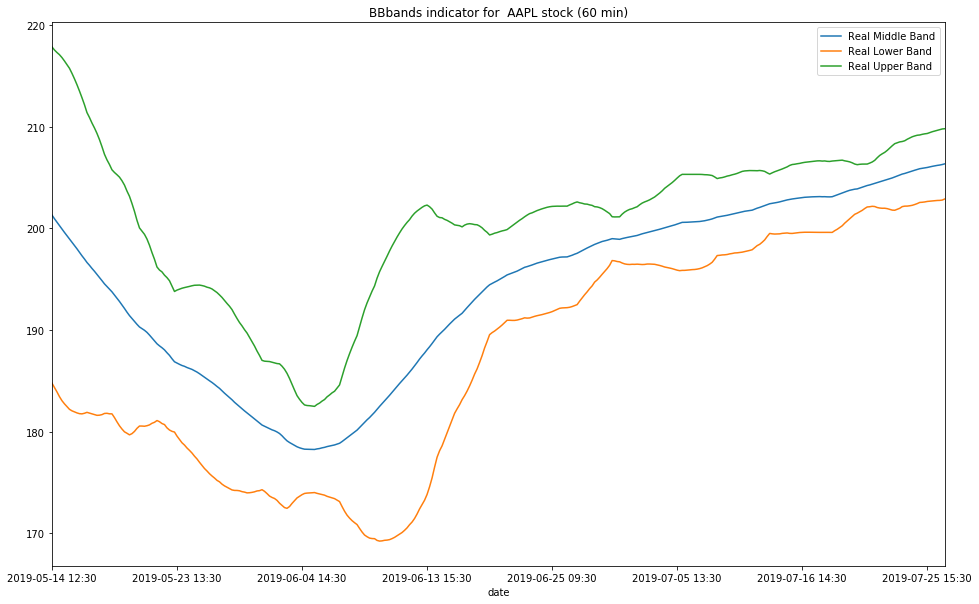

In [56]:
plt.figure(figsize=(20, 15))
bbands_data.plot(figsize=(16, 10))
plt.title('BBbands indicator for  AAPL stock (60 min)')
plt.show()

In [57]:
#Ahora implementaremos algunos indicadores para la misma acción, en este caso la EMA
#La EMA es la media movil, normalmente se toma la de 20, 50 y 100 días 
ema_data, ema_meta = ti.get_ema(symbol='AAPL', interval='daily', time_period=20)

In [58]:
ema_data.describe()

,EMA
count,5407.000000
mean,159.222238
std,157.778160
min,13.775300
25%,39.062550
50%,110.902100
75%,188.705900
max,680.031100


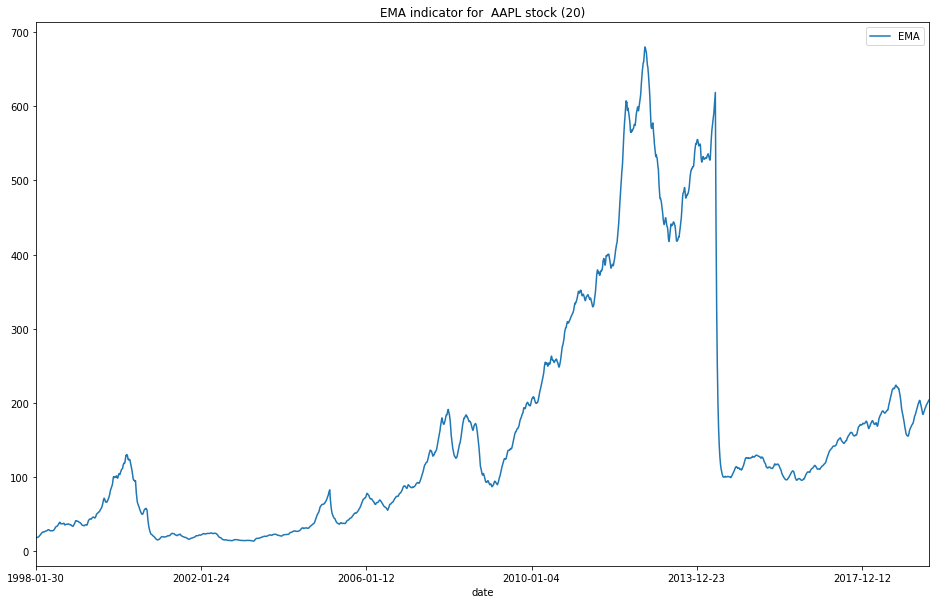

In [59]:
ema_data.plot(figsize=(16, 10))
plt.title('EMA indicator for  AAPL stock (20)')
plt.show()

In [60]:
ema_data.iplot(kind='scatter')

In [61]:
#Ahora haremos un análisis por sector 
from alpha_vantage.sectorperformance import SectorPerformances

sp = SectorPerformances(key='4G4C1CBEXYY4KVUC', output_format='pandas')
sector_data, sector_meta = sp.get_sector()

In [62]:
#sector_data contiene información de cada uno de los sectores con varios rankings
sector_data

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Communication Services,0.0325,0.0325,0.0456,0.0610,0.0231,0.2469,0.1981,-0.0544,0.0635,0.6307
Consumer Discretionary,0.0022,0.0022,0.0086,0.0471,0.0308,0.2512,0.0924,0.5067,0.8459,3.9693
Consumer Staples,0.0119,0.0119,0.0060,0.0267,0.0695,0.1898,0.1419,0.0941,0.3480,1.4622
Energy,-0.0050,-0.0050,-0.0055,-0.0019,-0.0706,0.0882,-0.1811,-0.0819,-0.3660,0.1647
Financials,0.0099,0.0099,0.0268,0.0599,0.0448,0.2026,0.0209,0.4946,0.5430,1.8432
Health Care,0.0042,0.0042,0.0036,-0.0098,0.0437,0.0636,0.0374,0.2301,0.4878,2.2871
Industrials,-0.0017,-0.0017,0.0138,0.0275,0.0200,0.2195,0.0445,0.3129,0.4285,2.2499
Information Technology,0.0056,0.0056,0.0241,0.0720,0.0474,0.3317,0.1069,0.9169,1.2133,3.6168
Materials,0.0004,0.0004,0.0096,0.0184,0.0442,0.1689,-0.0023,0.2150,0.1700,1.1431
Real Estate,0.0033,0.0033,0.0074,-0.0032,0.0364,0.1923,0.1389,NaN,NaN,NaN


In [63]:
sector_data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000
mean,0.006127,0.006127,0.012173,0.026064,0.029418,0.189791,0.067836,0.277150,0.414510,1.839450
std,0.009962,0.009962,0.015087,0.030459,0.035771,0.076243,0.103305,0.299715,0.427248,1.230016
min,-0.005000,-0.005000,-0.006100,-0.011000,-0.070600,0.063600,-0.181100,-0.081900,-0.366000,0.164700
25%,0.001300,0.001300,0.004800,-0.002550,0.026950,0.150950,0.029150,0.104950,0.214500,1.056400
50%,0.004100,0.004100,0.008600,0.026700,0.036400,0.192300,0.092400,0.222550,0.419800,1.652700
75%,0.007750,0.007750,0.018950,0.053500,0.044500,0.233200,0.140400,0.449175,0.529200,2.277800
max,0.032500,0.032500,0.045600,0.072000,0.069500,0.331700,0.198100,0.916900,1.213300,3.969300


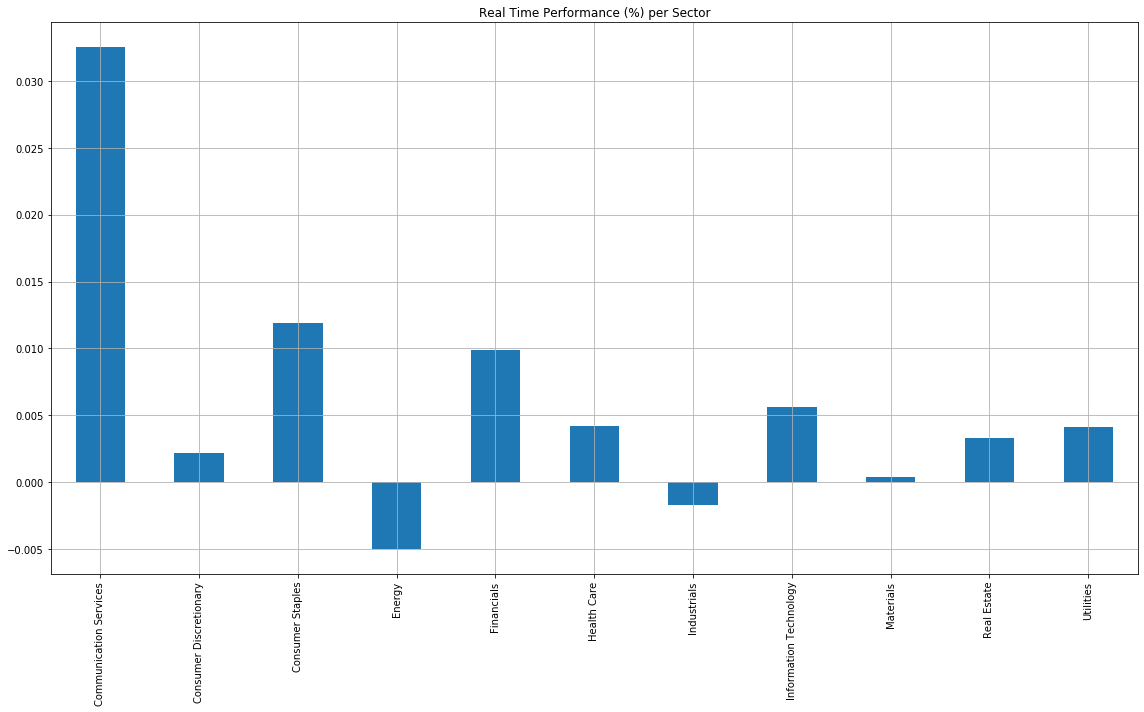

In [64]:
plt.figure(figsize=(16, 10))
sector_data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

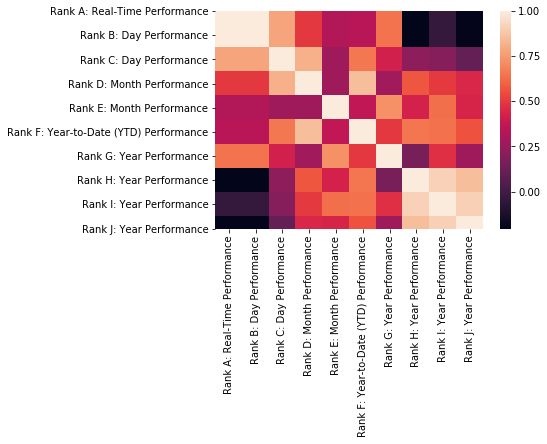

In [65]:
#Vemos si hay alguna correlación entre los rankings 
sns.heatmap(sector_data.corr())

In [129]:
#Finalmente vamos a accesar a Forex, o el tipo de cambio por divisas
#En este caso vamos a ver como está el peso mexicano con el dolar
from alpha_vantage.foreignexchange import ForeignExchange
cc = ForeignExchange(key='4G4C1CBEXYY4KVUC')
fx_data, _ = cc.get_currency_exchange_rate(from_currency='USD',to_currency='MXN')
pprint(fx_data)

{'1. From_Currency Code': 'USD',
 '2. From_Currency Name': 'United States Dollar',
 '3. To_Currency Code': 'MXN',
 '4. To_Currency Name': 'Mexican Peso',
 '5. Exchange Rate': '19.04700000',
 '6. Last Refreshed': '2019-07-29 02:57:23',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '19.03800000',
 '9. Ask Price': '19.05500000'}
